In [39]:
import pandas as pd
import matplotlib as mt
import regex as re
import pandas as pd
from datetime import datetime
import emojis
import numpy as np
import plotly.express as px
from collections import Counter

In [40]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)([\/-])([0-9]+)([\/-])([0-9]+)[,]? ([0-9]+):([0-9][0-9])[ ]?(AM|PM|am|pm)?'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [41]:
startsWithDateAndTime('Amaan Shaikh deleted this group')

False

In [42]:
def getData(line):
    splitLine = line.split(' -')
    dateTime = splitLine[0]
    if ',' in dateTime:
        date = dateTime.split(',')[0]
        time = dateTime.split(',')[1]
    else:
        date = dateTime.split(' ')[0]
        time = dateTime.split(' ')[1]
    splitMessage = splitLine[1].split(': ')
    sender = splitMessage[0]
    message = ' '.join(splitMessage[1:])
    
#     print(date)
#     print(time)
#     print(sender)
#     print(message)
    return date, time, sender, message

In [43]:
getData('2/1/21, 5:03 PM - Amaan Shaikh: Nahi Nahi ti age geli ata')

('2/1/21', ' 5:03 PM', ' Amaan Shaikh', 'Nahi Nahi ti age geli ata')

In [68]:
parsedData = []
with open('Downloads/waChat.txt', encoding="utf-8") as fp:

    buff = []
    date, time, sender = None, None, None
    while True:
        line = fp.readline()
        line.strip()
        
        if not line:
            break
        if startsWithDateAndTime(line):
#             if len(buff) > 0:
#                 parsedData.append([date, time, sender, buff])
#             buff.clear()
            date, time, sender, message = getData(line)
            parsedData.append([date, time, sender, message])
#             buff.append(message)
    #print(parsedData[0])
def convertDate(date):
    return datetime.strptime(date, "%m/%d/%y").strftime("%m-%d-%y")

df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Sender', 'Message'])

df['Date'] = df['Date'].apply(convertDate)
df = df[df["Sender"].isin([" ~vinayak", " Amaan Shaikh", " Sanket Sonawane 2", " Dnyaneshwar ware"])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39887 entries, 0 to 39998
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     39887 non-null  object
 1   Time     39887 non-null  object
 2   Sender   39887 non-null  object
 3   Message  39887 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [45]:
df.head(5)

,Date,Time,Sender,Message
0,01-30-21,7:45 PM,Sanket Sonawane 2,noice 😂\n
1,01-30-21,9:29 PM,Sanket Sonawane 2,<Media omitted>\n
2,01-30-21,9:30 PM,Amaan Shaikh,😂\n
3,01-30-21,10:16 PM,~vinayak,Jya baine keli complent tila kahi kam nasel va...
4,01-30-21,10:16 PM,~vinayak,😂\n


In [46]:
df.dropna()

,Date,Time,Sender,Message
0,01-30-21,7:45 PM,Sanket Sonawane 2,noice 😂\n
1,01-30-21,9:29 PM,Sanket Sonawane 2,<Media omitted>\n
2,01-30-21,9:30 PM,Amaan Shaikh,😂\n
3,01-30-21,10:16 PM,~vinayak,Jya baine keli complent tila kahi kam nasel va...
4,01-30-21,10:16 PM,~vinayak,😂\n
...,...,...,...,...
39994,04-18-21,2:36 PM,Sanket Sonawane 2,bai la sangtana gondhal jhala asel\n
39995,04-18-21,2:39 PM,Sanket Sonawane 2,query la bai curie sarkha bolte aahe 😂😂\n
39996,04-18-21,2:50 PM,Amaan Shaikh,mala ka yeta nahiye aat madhe\n
39997,04-18-21,2:51 PM,Sanket Sonawane 2,open aahe\n


In [47]:
media = df[df['Message'] == '<Media omitted>\n'].shape[0]
media

2444

In [48]:
def split_count(text):
    return emojis.get(text)

df["emoji"] = df["Message"].apply(split_count)

In [49]:
split_count("djfdk")

set()

In [50]:
total_emoji = sum(df['emoji'].str.len())
print(total_emoji)

11044


In [51]:
df.head(3)

,Date,Time,Sender,Message,emoji
0,01-30-21,7:45 PM,Sanket Sonawane 2,noice 😂\n,{😂}
1,01-30-21,9:29 PM,Sanket Sonawane 2,<Media omitted>\n,{}
2,01-30-21,9:30 PM,Amaan Shaikh,😂\n,{😂}


In [52]:
total_messages = df.shape[0]
total_messages

39887

In [53]:
URL = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda mes: re.findall(URL, mes)).str.len()

In [54]:
total_url = sum(df['urlcount'])
total_url

398

In [55]:
print('Group Stats')
print("Messages: ", total_messages)
print("Emoji: ", total_emoji)
print("Media: ", media)
print("URL: ", total_url)

Group Stats
Messages:  39887
Emoji:  11044
Media:  2444
URL:  398


In [56]:
media_messages_df = df[(df['Message'] == '<Media omitted>\n')]
media_messages_df

,Date,Time,Sender,Message,emoji,urlcount
1,01-30-21,9:29 PM,Sanket Sonawane 2,<Media omitted>\n,{},0
12,01-31-21,10:17 AM,Dnyaneshwar ware,<Media omitted>\n,{},0
19,01-31-21,10:33 AM,Sanket Sonawane 2,<Media omitted>\n,{},0
34,01-31-21,2:27 PM,Sanket Sonawane 2,<Media omitted>\n,{},0
56,01-31-21,2:54 PM,Dnyaneshwar ware,<Media omitted>\n,{},0
...,...,...,...,...,...,...
39790,04-18-21,11:19 AM,~vinayak,<Media omitted>\n,{},0
39827,04-18-21,11:34 AM,Sanket Sonawane 2,<Media omitted>\n,{},0
39840,04-18-21,11:38 AM,Amaan Shaikh,<Media omitted>\n,{},0
39851,04-18-21,12:14 PM,~vinayak,<Media omitted>\n,{},0


In [57]:
messages_df = df.drop(media_messages_df.index)
messages_df

,Date,Time,Sender,Message,emoji,urlcount
0,01-30-21,7:45 PM,Sanket Sonawane 2,noice 😂\n,{😂},0
2,01-30-21,9:30 PM,Amaan Shaikh,😂\n,{😂},0
3,01-30-21,10:16 PM,~vinayak,Jya baine keli complent tila kahi kam nasel va...,{},0
4,01-30-21,10:16 PM,~vinayak,😂\n,{😂},0
5,01-30-21,10:22 PM,~vinayak,https://www.youtube.com/watch?v=S9JGmA5_unY\n,{},1
...,...,...,...,...,...,...
39994,04-18-21,2:36 PM,Sanket Sonawane 2,bai la sangtana gondhal jhala asel\n,{},0
39995,04-18-21,2:39 PM,Sanket Sonawane 2,query la bai curie sarkha bolte aahe 😂😂\n,{😂},0
39996,04-18-21,2:50 PM,Amaan Shaikh,mala ka yeta nahiye aat madhe\n,{},0
39997,04-18-21,2:51 PM,Sanket Sonawane 2,open aahe\n,{},0


In [58]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda msg : len(msg))
messages_df['Word_count'] = messages_df['Message'].apply(lambda s: len(s.split(' ')))
messages_df['emoji_count'] = messages_df['emoji'].str.len()
messages_df["ratio_wordToEmoji"]= messages_df['Word_count']/messages_df['emoji_count']
messages_df['ratio_wordToEmoji'].replace(np.inf, 0, inplace=True )
messages_df

,Date,Time,Sender,Message,emoji,urlcount,Letter_Count,Word_count,emoji_count,ratio_wordToEmoji
0,01-30-21,7:45 PM,Sanket Sonawane 2,noice 😂\n,{😂},0,8,2,1,2.0
2,01-30-21,9:30 PM,Amaan Shaikh,😂\n,{😂},0,2,1,1,1.0
3,01-30-21,10:16 PM,~vinayak,Jya baine keli complent tila kahi kam nasel va...,{},0,50,9,0,0.0
4,01-30-21,10:16 PM,~vinayak,😂\n,{😂},0,2,1,1,1.0
5,01-30-21,10:22 PM,~vinayak,https://www.youtube.com/watch?v=S9JGmA5_unY\n,{},1,44,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
39994,04-18-21,2:36 PM,Sanket Sonawane 2,bai la sangtana gondhal jhala asel\n,{},0,35,6,0,0.0
39995,04-18-21,2:39 PM,Sanket Sonawane 2,query la bai curie sarkha bolte aahe 😂😂\n,{😂},0,40,8,1,8.0
39996,04-18-21,2:50 PM,Amaan Shaikh,mala ka yeta nahiye aat madhe\n,{},0,30,6,0,0.0
39997,04-18-21,2:51 PM,Sanket Sonawane 2,open aahe\n,{},0,10,2,0,0.0


In [59]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37443 entries, 0 to 39998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               37443 non-null  object 
 1   Time               37443 non-null  object 
 2   Sender             37443 non-null  object 
 3   Message            37443 non-null  object 
 4   emoji              37443 non-null  object 
 5   urlcount           37443 non-null  int64  
 6   Letter_Count       37443 non-null  int64  
 7   Word_count         37443 non-null  int64  
 8   emoji_count        37443 non-null  int64  
 9   ratio_wordToEmoji  37443 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 3.1+ MB


In [60]:
messages_df.to_csv(r'Downloads/chatData.csv', index=False)

In [61]:
l = messages_df['Sender'].unique()

print('Data from 30/1/21 to 18/4/21')
print()
for i in range(len(l)):
    send_df = messages_df[messages_df['Sender'] == l[i]]
    sen_messages = send_df.shape[0]
    sen_emoji = sum(send_df['emoji'].str.len())
    sen_link = sum(send_df['urlcount'])
    sen_media = media_messages_df[ media_messages_df['Sender'] == l[i]].shape[0]
    sen_word_per_msg = round(np.sum(send_df['Word_count'])/send_df.shape[0], 2)
    sen_emoji_per_msg = round(sen_emoji/send_df.shape[0], 2)
    
    print("Sender: ",l[i])
    print()
    print('Total Messages: ', sen_messages)
    print('Total Emoji: ', sen_emoji)
    print('Total links: ', sen_link)
    print('Total Media: ', sen_media)
    print('Avg words per message: ', sen_word_per_msg)
    print('Avg emoji per message: ', sen_emoji_per_msg)
    print()
    
    
    

Data from 30/1/21 to 18/4/21

Sender:   Sanket Sonawane 2

Total Messages:  13359
Total Emoji:  5376
Total links:  78
Total Media:  580
Avg words per message:  3.87
Avg emoji per message:  0.4

Sender:   Amaan Shaikh

Total Messages:  7553
Total Emoji:  1447
Total links:  100
Total Media:  693
Avg words per message:  3.52
Avg emoji per message:  0.19

Sender:   ~vinayak

Total Messages:  6812
Total Emoji:  1772
Total links:  75
Total Media:  433
Avg words per message:  3.42
Avg emoji per message:  0.26

Sender:   Dnyaneshwar ware

Total Messages:  9719
Total Emoji:  2449
Total links:  145
Total Media:  738
Avg words per message:  3.6
Avg emoji per message:  0.25



In [62]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
#emoji_dict
emoji_dict = sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)


In [63]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,😂,6191
1,🤣,1101
2,🥲,459
3,🔥,453
4,😅,441
...,...,...
216,🍑,1
217,🍤,1
218,🦐,1
219,🔩,1


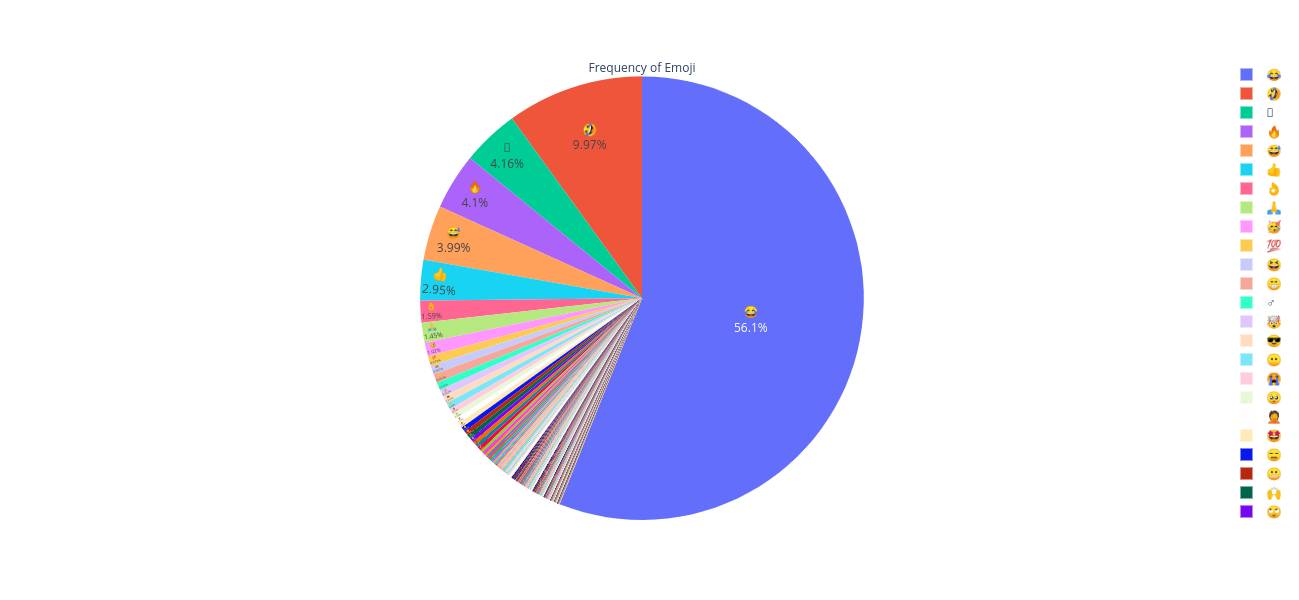

In [64]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label',title='Frequency of Emoji')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,)
fig.show()

 Sanket Sonawane 2


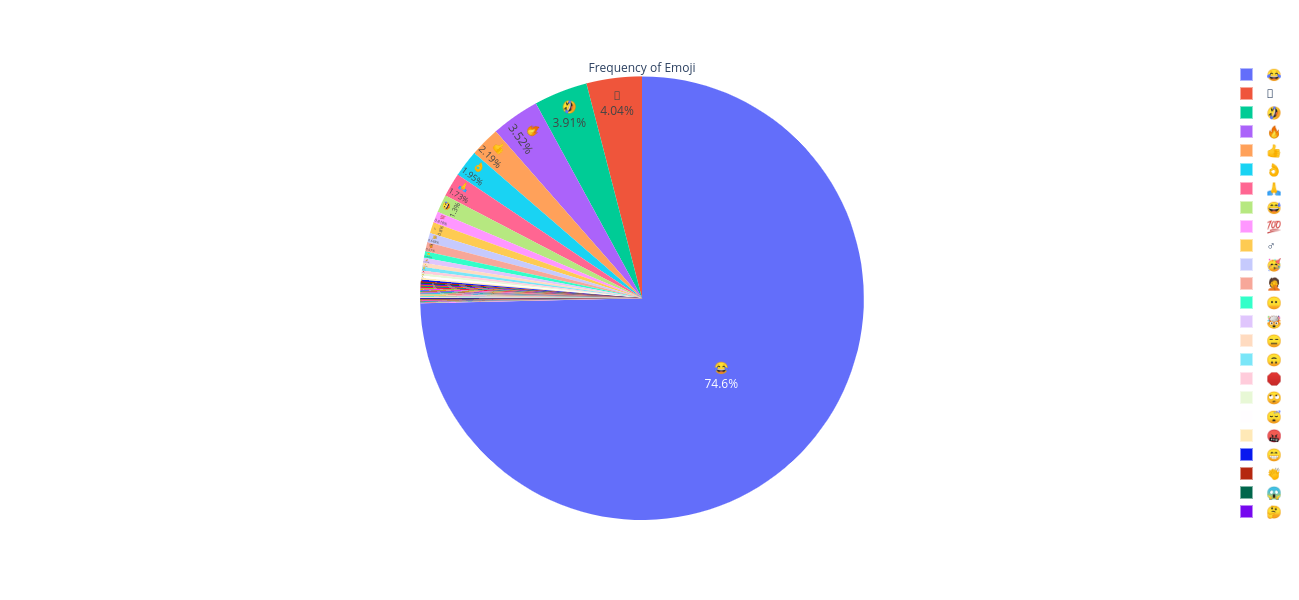

 Amaan Shaikh


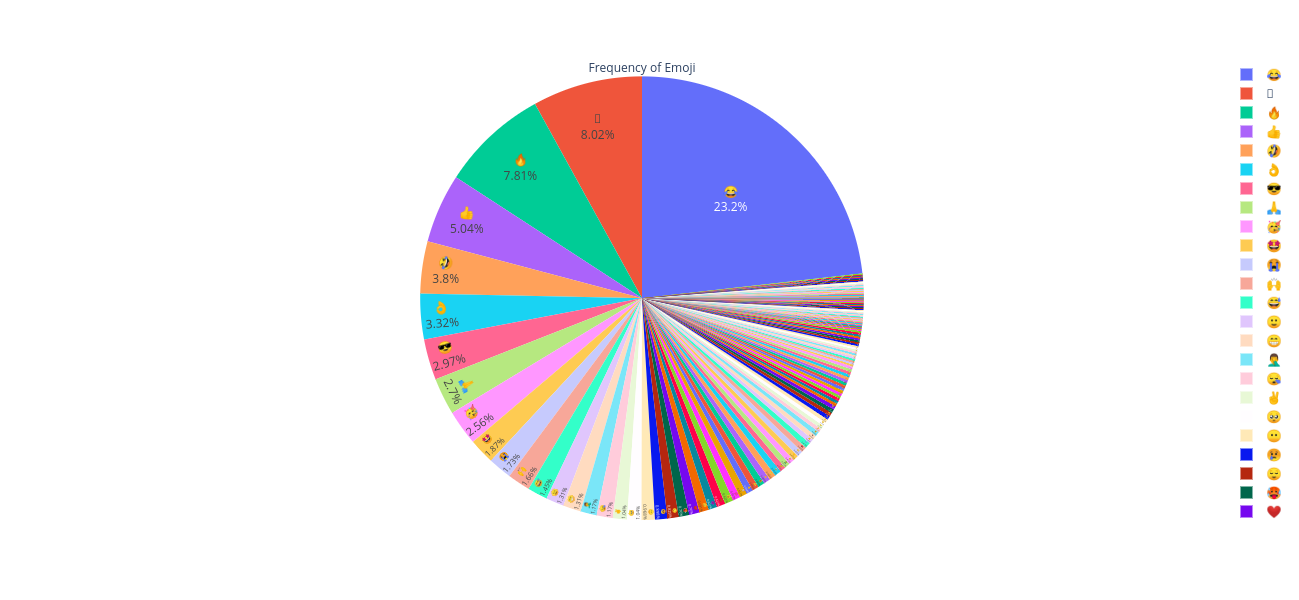

 ~vinayak


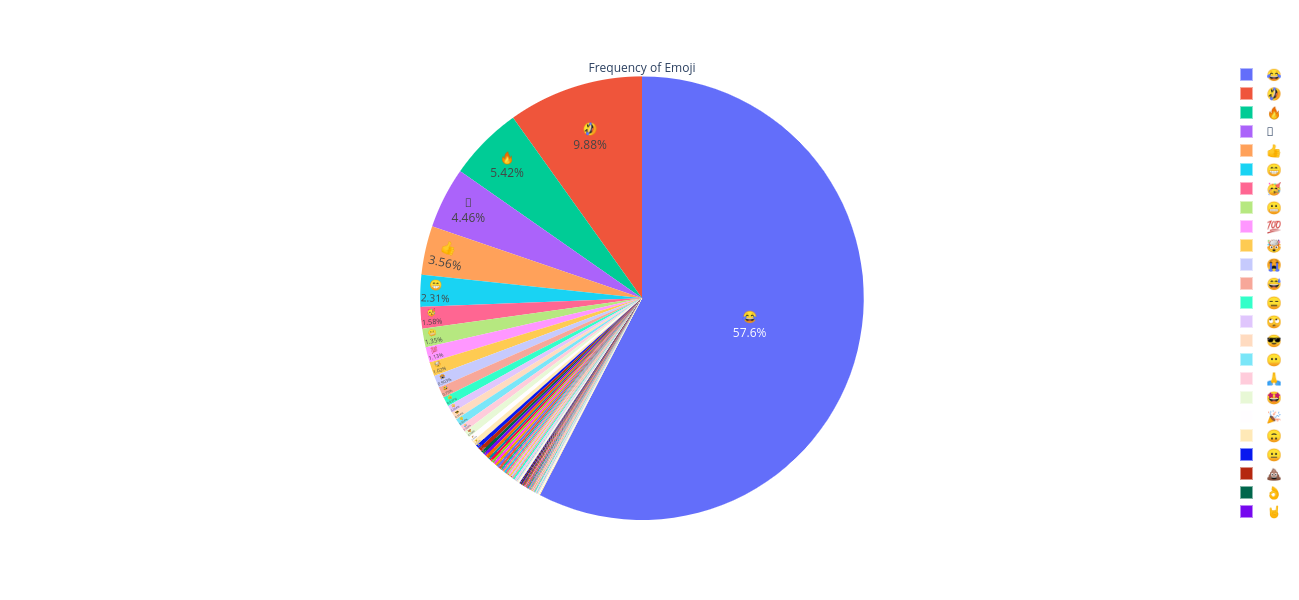

 Dnyaneshwar ware


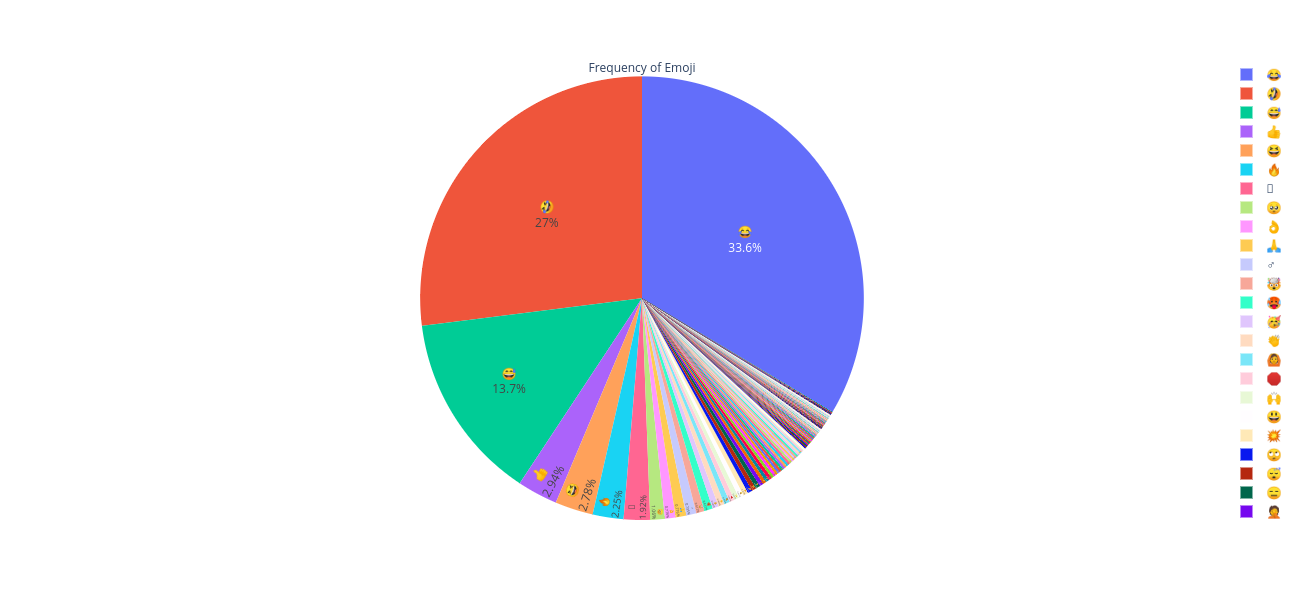

In [65]:
l = messages_df['Sender'].unique()
for i in range(len(l)):
    print(l[i])
    sen_df = messages_df[messages_df['Sender']== l[i]]
    sen_emojis_list = list([a for b in sen_df.emoji for a in b])
    sen_emoji_dict = dict(Counter(sen_emojis_list))
    #emoji_dict
    sen_emoji_dict = sorted(sen_emoji_dict.items(), key=lambda item: item[1], reverse=True)
    sen_emoji_df = pd.DataFrame(sen_emoji_dict, columns=['emoji', 'count'])
    fig1 = px.pie(sen_emoji_df, values='count', names='emoji')
    fig1.update_traces(textposition='inside', textinfo='percent+label',title='Frequency of Emoji')
    fig1.update_layout(
    autosize=False,
    width=600,
    height=600,)
    fig1.show()
    

Messages on particular day


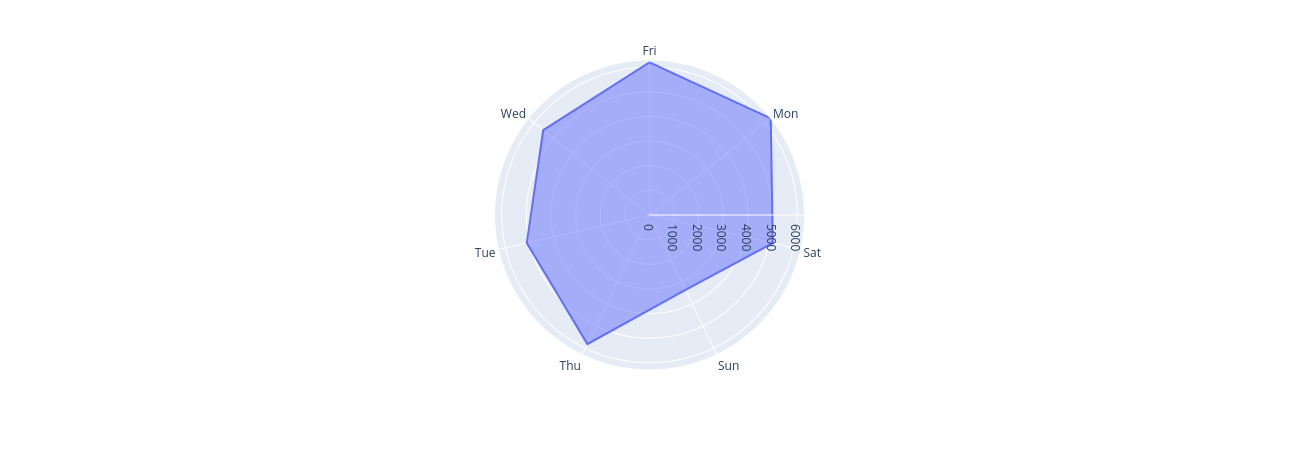

In [96]:
messages_df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df_day = pd.DataFrame(messages_df["Message"])
df_day['day'] = messages_df['Date'].dt.weekday

def getDay(i):
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    return days[i]
df_day["messagecount"] = 1
df_day['day'] = df_day['day'].apply(getDay)
day = df_day.groupby('day').sum()
day.reset_index(inplace=True)
fig2 = px.line_polar(day, r='messagecount', theta='day', line_close=True)
fig2.update_traces(fill='toself')
# fig2.update_layout(
#   polar=dict(
#     radialaxis=dict(
#       visible=True,
#         range=[0,7000]
#     )),
#   showlegend=True
# )
print('Messages on particular day')
fig2.show()

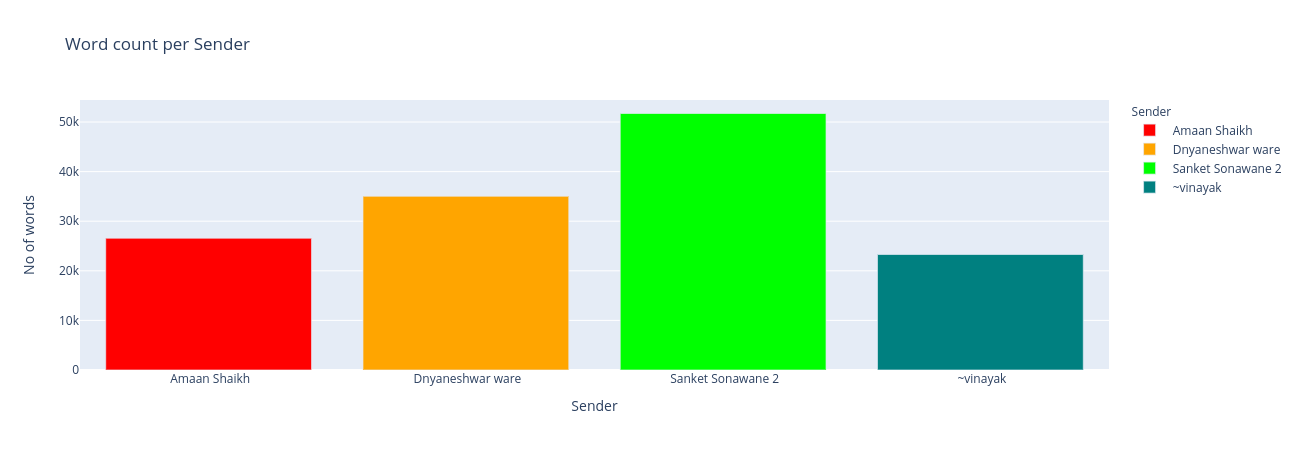

In [104]:
send = messages_df.groupby('Sender').sum()
send.reset_index(inplace=True)
fig3 = px.bar(send, x='Sender', y='Word_count', title="Word count per Sender", color="Sender", color_discrete_sequence=["red","orange","lime","teal"])
fig3.update_xaxes(title_text='Sender')
fig3.update_yaxes(title_text='No of words')
fig3.show()

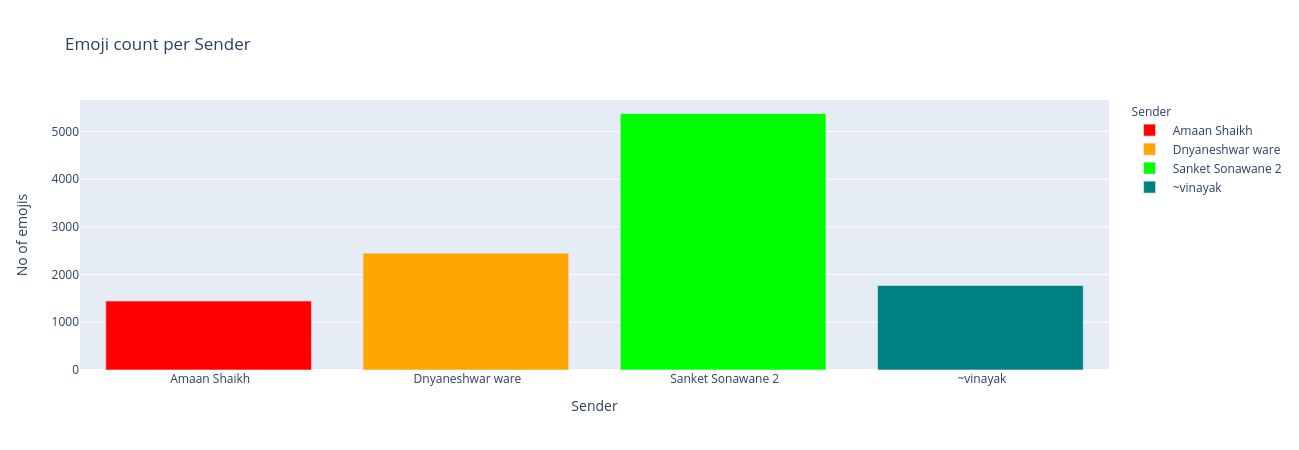

In [113]:
send = messages_df.groupby('Sender').sum()
send.reset_index(inplace=True)
fig4 = px.bar(send, x='Sender', y='emoji_count', title="Emoji count per Sender", color="Sender", color_discrete_sequence=["red","orange","lime","teal"])
fig4.update_xaxes(title_text='Sender')
fig4.update_yaxes(title_text='No of emojis')

fig4.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig4.show()

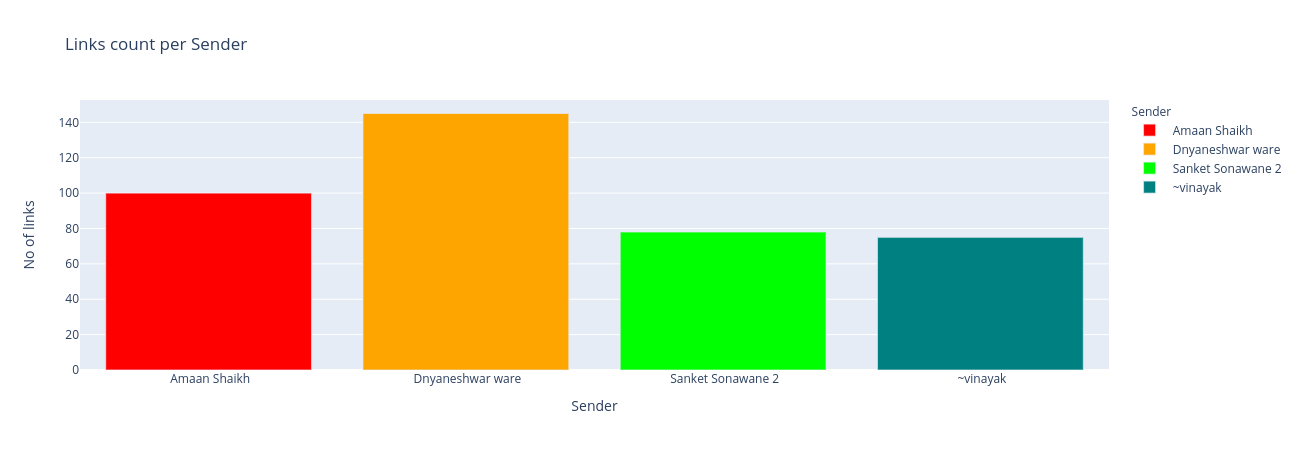

In [115]:
send = messages_df.groupby('Sender').sum()
send.reset_index(inplace=True)
fig4 = px.bar(send, x='Sender', y='urlcount', title="Links count per Sender", color="Sender", color_discrete_sequence=["red","orange","lime","teal"])
fig4.update_xaxes(title_text='Sender')
fig4.update_yaxes(title_text='No of links')

fig4.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig4.show()

In [ ]:
send = messages_df.groupby('Sender').sum()
send.reset_index(inplace=True)
fig4 = px.bar(send, x='Sender', y='emoji_count', title="Emoji count per Sender", color="Sender", color_discrete_sequence=["red","orange","lime","teal"])
fig4.update_xaxes(title_text='Sender')
fig4.update_yaxes(title_text='No of emojis')

fig4.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig4.show()

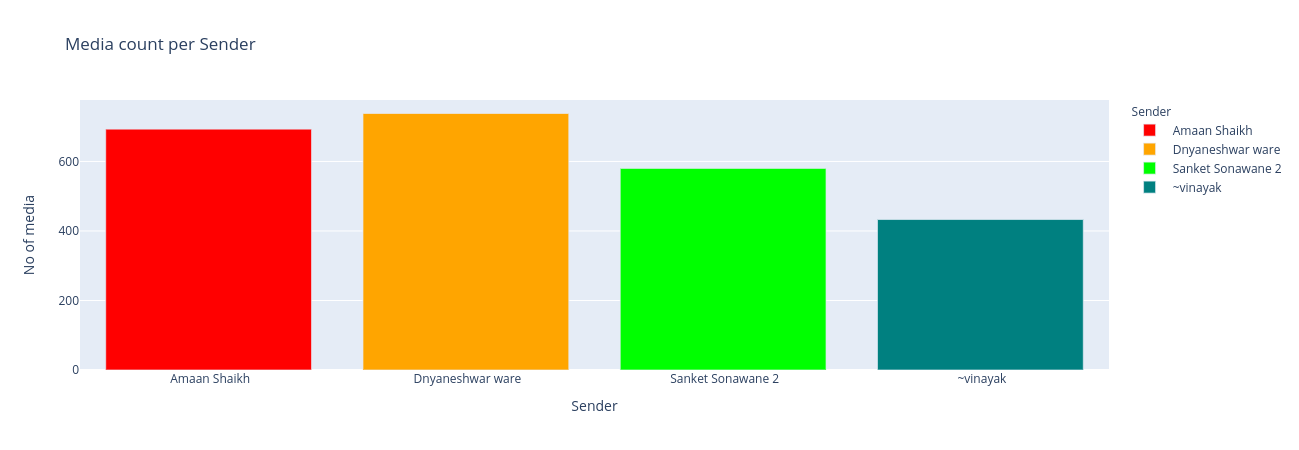

In [137]:
media_messages_df['media_count'] = 1
media_send = media_messages_df.groupby('Sender').sum()
media_send.reset_index(inplace=True)
fig5 = px.bar(media_send, x='Sender', y='media_count', title="Media count per Sender", color="Sender", color_discrete_sequence=["red","orange","lime","teal"])
fig5.update_xaxes(title_text='Sender')
fig5.update_yaxes(title_text='No of media')

fig5.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig5.show()